In [1]:
import pandas as pd

df = pd.read_excel("data/LF5.xlsx", sheet_name=0)

In [3]:
df.head(10)

,STT,Unnamed: 1,Ca,Mẻ\ntinh\nluyện\nsố,Mác thép yêu cầu,Thời gian vào tinh luyện,Bắt đầu,Kết thúc,Thời gian lên đúc,Thùng LF,...,Nhiệt độ đúc yêu cầu,Nhiệt độ đo trên đúc,Thời gian đình trệ,"Lý do đình trệ (Nối than, chờ đúc, bảo trì, chờ thép từ lò thổi…)","GHI CHÚ 1 ( THÉP Chắt, không Ar,...)",Thời gian bắt đầu thổi mềm,Thời gian kết thú thổi mềm,Tổng thời gian thổi mềm,"Tình trạng xỉ lò thổi qua tinh luyện\nMàu sắc (Đen, xanh,nâu…)","Tình trạng xỉ (Dày, lỏng, Hồ quang kêu to, Bình thường,….)"
0,1,1.0,1A,B7350,SAE1006AL,0.299306,0.303472,0.330556,0.34375,45,...,NaN,NaN,NaN,NaN,NaN,0.334722,0.340278,0.005556,NaN,NaN
1,2,1.0,1A,B7351,SAE1006AL,0.325694,0.333333,0.350694,0.361806,18,...,NaN,NaN,NaN,NaN,NaN,0.352778,0.358333,0.005556,NaN,NaN
2,3,1.0,1A,A7128,SAE1006AL,0.357639,0.363194,0.376389,0.384028,4,...,NaN,NaN,NaN,NaN,NaN,0.377778,0.383333,0.005556,NaN,NaN
3,4,1.0,1A,C7519,SAE1006AL,0.378472,0.383333,0.397917,0.4125,19,...,NaN,NaN,NaN,NaN,NaN,0.402778,0.408333,0.005556,NaN,NaN
4,5,1.0,1A,C7520,SAE1006AL,0.401389,0.405556,0.419444,0.433333,41,...,NaN,NaN,NaN,NaN,NaN,0.425000,0.430556,0.005556,NaN,NaN
5,6,1.0,1A,C7521,SAE1006AL,0.427778,0.431250,0.447222,0.457639,17,...,NaN,NaN,NaN,NaN,NaN,0.451389,0.456944,0.005556,NaN,NaN
6,7,1.0,1A,C7522,SAE1006AL,0.495139,0.499306,0.556944,0.569444,43,...,NaN,NaN,NaN,NaN,NaN,0.562500,0.568056,0.005556,NaN,NaN
7,8,1.0,1A,C7523,SAE1006AL,0.522222,0.526389,0.584722,0.599306,21,...,NaN,NaN,NaN,NaN,NaN,0.590278,0.595833,0.005556,NaN,NaN
8,9,1.0,1A,A7134,SAE1006AL,0.577778,0.590972,0.616667,0.629167,17,...,NaN,NaN,NaN,NaN,NaN,0.621528,0.627083,0.005556,NaN,NaN
9,10,1.0,1A,A7135,SAE1006AL,0.602083,0.618750,0.650694,0.661111,4,...,NaN,NaN,NaN,NaN,NaN,0.654167,0.659722,0.005556,NaN,NaN


# Phân tích dữ liệu LF5: Chuẩn hóa, giải thích cột, và EDA

Mục tiêu:
- Chuẩn hóa tên cột (loại bỏ xuống dòng, xóa cột `Unnamed:*`).
- Chuyển đổi các cột thời gian dạng số thập phân (Excel fractional day) sang thời gian dễ đọc.
- Tính các chỉ số chính: `Thời gian LF (phút)`, `Thời gian thổi mềm (phút)`, `Chênh lệch nhiệt độ`.
- Giải thích ý nghĩa các cột chính và các cột dẫn xuất.
- Thực hiện EDA: thống kê, thiếu dữ liệu, phân tích theo ca và mác thép.
- Lưu dữ liệu đã xử lý vào `data/LF5_processed.csv`.

Các cột chính (quan sát từ dữ liệu):
- `STT`: Số thứ tự bản ghi.
- `Ca`: Ca vận hành (ví dụ 1A, 2B...).
- `Mẻ tinh luyện số`: Mã/ID mẻ thép tại LF.
- `Mác thép yêu cầu`: Mác thép mục tiêu cần đạt.
- `Thời gian vào tinh luyện` / `Bắt đầu` / `Kết thúc`: Thời điểm (giờ trong ngày) tương ứng các mốc ở LF.
- `Thời gian lên đúc`: Thời điểm ladle tới máy đúc.
- `Thời gian bắt đầu thổi mềm` / `Thời gian kết thúc thổi mềm`: Mốc thời gian phiên thổi mềm.
- `Tổng thời gian thổi mềm`: Tổng thời lượng thổi mềm (có thể tự tính lại để kiểm tra).
- `Thùng LF`: ID thùng/ladle.
- `Nhiệt độ đúc yêu cầu` / `Nhiệt độ đo trên đúc`: Nhiệt độ mục tiêu vs thực tế tại máy đúc.
- `Thời gian đình trệ` + `Lý do đình trệ`: Hiện tượng trễ và nguyên nhân (nối than, chờ đúc, bảo trì...).
- `Ghi chú`: Các ghi chú vận hành (thép chắt, không Ar...).
- `Tình trạng xỉ...`: Đặc tính xỉ (màu, độ dày/lỏng, tiếng hồ quang...).

Các cột dẫn xuất sẽ thêm:
- `Thời gian LF (phút)`: (Kết thúc - Bắt đầu) đổi ra phút.
- `Thời gian thổi mềm (phút)`: (Kết thúc thổi mềm - Bắt đầu thổi mềm) đổi ra phút.
- `Chênh lệch nhiệt độ`: (Nhiệt độ đo trên đúc - Nhiệt độ đúc yêu cầu).


In [ ]:
# Chuẩn hóa tên cột và chuyển đổi thời gian
import numpy as np
import matplotlib.pyplot as plt

# 1) Chuẩn hóa tên cột: bỏ xuống dòng, trim, bỏ Unnamed:*
df.columns = df.columns.str.replace(r"\s*\n\s*", " ", regex=True).str.strip()
# df = df.drop(columns=[c for c in df.columns if c.startswith("Unnamed")], errors='ignore')

# 2) Xác định các cột thời gian (giờ trong ngày dạng số thập phân ngày)
time_cols = [c for c in df.columns if ('Thời gian' in c) or (c in ['Bắt đầu','Kết thúc'])]

# Chuyển cột thời gian từ số thập phân ngày sang datetime (base 1899-12-30)
base_date = pd.Timestamp('1899-12-30')
for c in time_cols:
    try:
        vals = pd.to_numeric(df[c], errors='coerce')
        df[c] = base_date + pd.to_timedelta(vals, unit='D')
    except Exception:
        pass

# 3) Xác định cột thổi mềm (tên có thể khác nhau nhẹ)
col_blow_start = next((c for c in df.columns if 'Thời gian bắt đầu thổi mềm' in c), None)
col_blow_end   = next((c for c in df.columns if ('Thời gian kết' in c and 'thổi mềm' in c)), None)

# Helper xử lý rollover qua nửa đêm: nếu chênh âm, cộng thêm 1 ngày
from pandas import Timedelta

def duration_minutes(end_series, start_series):
    dur = end_series - start_series
    # xử lý NaT an toàn
    mask_neg = dur.dt.total_seconds() < 0
    dur = dur.where(~mask_neg, dur + Timedelta(days=1))
    return dur.dt.total_seconds() / 60

# 4) Tính các chỉ số chính
# Thời gian LF (phút)
if {'Bắt đầu','Kết thúc'}.issubset(df.columns):
    df['Thời gian LF (phút)'] = duration_minutes(df['Kết thúc'], df['Bắt đầu'])

# Thời gian thổi mềm (phút)
if col_blow_start and col_blow_end:
    df['Thời gian thổi mềm (phút)'] = duration_minutes(df[col_blow_end], df[col_blow_start])

# Thời gian chờ lên đúc (phút)
if {'Thời gian lên đúc','Kết thúc'}.issubset(df.columns):
    df['Thời gian chờ lên đúc (phút)'] = duration_minutes(df['Thời gian lên đúc'], df['Kết thúc'])

# Chênh lệch nhiệt độ
if {'Nhiệt độ đúc yêu cầu','Nhiệt độ đo trên đúc'}.issubset(df.columns):
    req = pd.to_numeric(df['Nhiệt độ đúc yêu cầu'], errors='coerce')
    act = pd.to_numeric(df['Nhiệt độ đo trên đúc'], errors='coerce')
    df['Chênh lệch nhiệt độ'] = act - req

# 5) Tạo phiên bản thời gian dạng chuỗi HH:MM để lưu ra CSV dễ đọc
for c in time_cols:
    if c in df.columns and np.issubdtype(df[c].dtype, np.datetime64):
        df[f"{c} (hh:mm)"] = df[c].dt.strftime('%H:%M')

print('Các cột sau khi chuẩn hóa (ví dụ 20 cột đầu):')
print(df.columns[:20].tolist())
print('\nKích thước dữ liệu:', df.shape)

# Hiển thị một vài KPI đầu
cols_preview = [c for c in ['Thời gian LF (phút)','Thời gian thổi mềm (phút)','Thời gian chờ lên đúc (phút)','Chênh lệch nhiệt độ'] if c in df.columns]
print('\nXem nhanh các KPI (5 dòng):')
print(df[cols_preview].head())


Các cột sau khi chuẩn hóa (ví dụ 20 cột đầu):
['STT', 'Ca', 'Mẻ tinh luyện số', 'Mác thép yêu cầu', 'Thời gian vào tinh luyện', 'Bắt đầu', 'Kết thúc', 'Thời gian lên đúc', 'Thùng LF', 'Lần luyện thứ', 'Nhiệt độ vào TL', 'C', 'Si', 'Mn', 'S', 'P', 'Khối lượng thùng thép', 'FeSi', 'FeMn', 'SiMn']

Kích thước dữ liệu: (338, 69)

Xem nhanh các KPI (5 dòng):
   Thời gian LF (phút)  Thời gian thổi mềm (phút)  \
0                 39.0                        8.0   
1                 25.0                        8.0   
2                 19.0                        8.0   
3                 21.0                        8.0   
4                 20.0                        8.0   

   Thời gian chờ lên đúc (phút)  Chênh lệch nhiệt độ  
0                          19.0                  NaN  
1                          16.0                  NaN  
2                          11.0                  NaN  
3                          21.0                  NaN  
4                          20.0                  N

# Giải thích cột và thêm mô tả

Dưới đây là giải thích nhanh các nhóm cột trong bảng dữ liệu sau khi đã chuẩn hóa tên cột:

- Nhận diện phiên làm việc:
  - `STT`: số thứ tự bản ghi.
  - `Ca`: ca vận hành (ví dụ 1A, 2B...).
  - `Mẻ tinh luyện số`: ID/mã mẻ thép tại LF.
  - `Thùng LF`: ID thùng/ladle sử dụng.
  - `Lần luyện thứ`: số lần tinh luyện trong ca hoặc chu kỳ.

- Mác thép & mục tiêu:
  - `Mác thép yêu cầu`: mác thép mục tiêu.
  - `Nhiệt độ đúc yêu cầu`: nhiệt độ mục tiêu tại máy đúc.
  - `Nhiệt độ đo trên đúc`: nhiệt độ thực tế đo tại máy đúc.

- Mốc thời gian (đã chuyển sang dạng thời gian ngày-giờ):
  - `Thời gian vào tinh luyện`: thời điểm ladle vào LF.
  - `Bắt đầu`, `Kết thúc`: thời điểm bắt đầu/kết thúc tinh luyện.
  - `Thời gian lên đúc`: thời điểm ladle lên máy đúc.
  - `Thời gian bắt đầu thổi mềm`, `Thời gian kết thúc thổi mềm`: phiên thổi mềm.

- Thành phần & vật liệu thêm (ví dụ):
  - `Khối lượng thùng thép`: trọng lượng thùng thép.
  - `FeSi`, `FeMn`, `SiMn`, ...: phụ gia/hợp kim đưa vào.
  - `C`, `Si`, `Mn`, `S`, `P`: thành phần hóa học đo được.

- Tình trạng vận hành:
  - `Thời gian đình trệ` + `Lý do đình trệ`: phần trễ và nguyên nhân (nối than, chờ đúc...).
  - `Ghi chú`: ghi chú vận hành.
  - `Tình trạng xỉ...`: mô tả xỉ (màu, dày/lỏng, tiếng hồ quang...).

- Các cột dẫn xuất đã thêm:
  - `Thời gian LF (phút)`: (Kết thúc - Bắt đầu) đổi ra phút.
  - `Thời gian thổi mềm (phút)`: (Kết thúc thổi mềm - Bắt đầu thổi mềm) đổi ra phút.
  - `Chênh lệch nhiệt độ`: (Nhiệt độ đo trên đúc - Nhiệt độ đúc yêu cầu).
  - Phiên bản chuỗi `(... hh:mm)`: hiển thị mốc thời gian ở dạng HH:MM.


In [3]:
# EDA: thống kê, thiếu dữ liệu, nhóm theo ca/mác

# 1) Thống kê mô tả
summary_num = df.describe(include='number')
print('Thống kê số liệu (numeric):')
print(summary_num)

# 2) Thiếu dữ liệu
missing = df.isna().sum().sort_values(ascending=False)
print('\nTop 15 cột thiếu dữ liệu nhiều nhất:')
print(missing.head(15))

# 3) Phân tích theo ca (nếu có cột liên quan)
cols_kpi = [c for c in ['Thời gian LF (phút)', 'Thời gian thổi mềm (phút)', 'Chênh lệch nhiệt độ'] if c in df.columns]
if 'Ca' in df.columns and cols_kpi:
    by_shift = df.groupby('Ca')[cols_kpi].agg(['mean','std','count'])
    print('\nChỉ số theo Ca:')
    print(by_shift)

# 4) Phân tích theo mác thép
if 'Mác thép yêu cầu' in df.columns and cols_kpi:
    by_grade = df.groupby('Mác thép yêu cầu')[cols_kpi].agg(['mean','std','count'])
    print('\nChỉ số theo Mác thép yêu cầu:')
    print(by_grade.head(10))


Thống kê số liệu (numeric):
              STT  Lần luyện thứ  Nhiệt độ vào TL           C          Si  \
count  338.000000     338.000000       338.000000  337.000000  337.000000   
mean   169.500000       1.005917      1554.988166    0.036445    0.006243   
std     97.716426       0.076809        21.291530    0.162092    0.004801   
min      1.000000       1.000000      1491.000000    0.000000    0.000000   
25%     85.250000       1.000000      1537.000000    0.020000    0.003000   
50%    169.500000       1.000000      1554.000000    0.030000    0.005000   
75%    253.750000       1.000000      1570.000000    0.030000    0.008000   
max    338.000000       2.000000      1611.000000    3.000000    0.040000   

               Mn           S           P  Khối lượng thùng thép  FeSi  ...  \
count  337.000000  337.000000  337.000000                    0.0   0.0  ...   
mean     0.120561    0.007890    0.010905                    NaN   NaN  ...   
std      0.021206    0.004665    0.002710

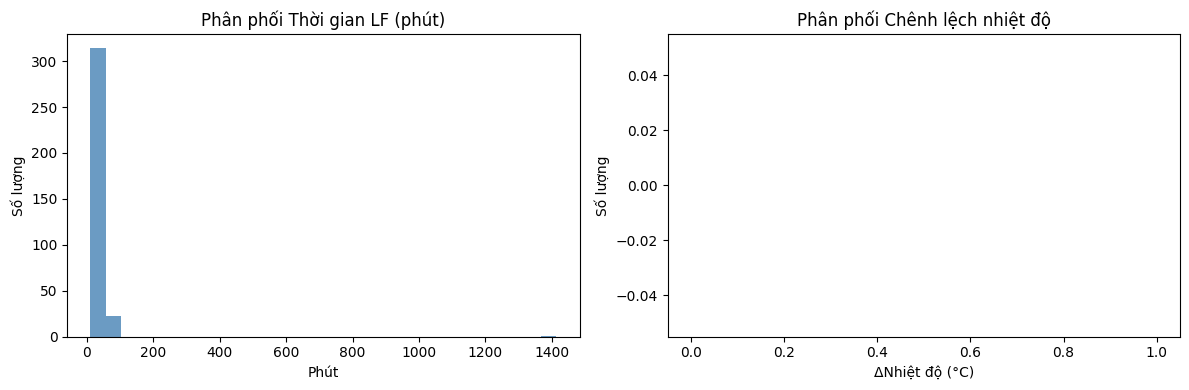

<Figure size 1000x500 with 0 Axes>

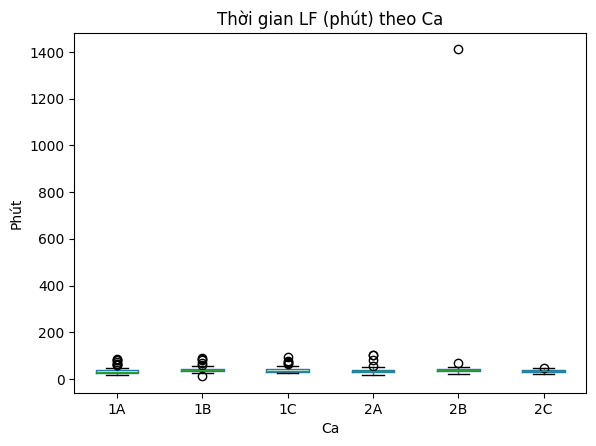

In [10]:
# Biểu đồ phân phối & theo ca (matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
if 'Thời gian LF (phút)' in df.columns:
    plt.subplot(1,2,1)
    plt.hist(df['Thời gian LF (phút)'].dropna(), bins=30, color='steelblue', alpha=0.8)
    plt.title('Phân phối Thời gian LF (phút)')
    plt.xlabel('Phút')
    plt.ylabel('Số lượng')

if 'Chênh lệch nhiệt độ' in df.columns:
    plt.subplot(1,2,2)
    plt.hist(df['Chênh lệch nhiệt độ'].dropna(), bins=30, color='salmon', alpha=0.8)
    plt.title('Phân phối Chênh lệch nhiệt độ')
    plt.xlabel('ΔNhiệt độ (°C)')
    plt.ylabel('Số lượng')

plt.tight_layout()
plt.show()

# Boxplot Thời gian LF theo Ca (dùng pandas + matplotlib)
if 'Ca' in df.columns and 'Thời gian LF (phút)' in df.columns:
    plt.figure(figsize=(10,5))
    df.boxplot(column='Thời gian LF (phút)', by='Ca', grid=False)
    plt.title('Thời gian LF (phút) theo Ca')
    plt.suptitle('')  # bỏ tiêu đề phụ của pandas
    plt.xlabel('Ca')
    plt.ylabel('Phút')
    plt.show()


In [11]:
# Kiểm tra bất thường và lưu CSV đã xử lý

# 1) Cờ bất thường cho thời gian LF
if 'Thời gian LF (phút)' in df.columns:
    lf = df['Thời gian LF (phút)']
    q99 = lf.dropna().quantile(0.99)
    df['LF_outlier'] = (lf < 5) | (lf > max(120, q99))
    print(f"Số bản ghi LF_outlier: {int(df['LF_outlier'].sum())}")

# 2) Cờ bất thường cho thổi mềm
if 'Thời gian thổi mềm (phút)' in df.columns:
    blow = df['Thời gian thổi mềm (phút)']
    df['Blow_outlier'] = (blow < 3) | (blow > 40)
    print(f"Số bản ghi Blow_outlier: {int(df['Blow_outlier'].sum())}")

# 3) Lọc các cột quan trọng để xuất
export_cols = [
    'STT','Ca','Mẻ tinh luyện số','Mác thép yêu cầu','Thùng LF',
    'Thời gian vào tinh luyện (hh:mm)','Bắt đầu (hh:mm)','Kết thúc (hh:mm)','Thời gian lên đúc (hh:mm)',
    'Thời gian LF (phút)','Thời gian thổi mềm (phút)','Thời gian chờ lên đúc (phút)','Chênh lệch nhiệt độ',
    'LF_outlier','Blow_outlier'
]
export_cols = [c for c in export_cols if c in df.columns]

# 4) Lưu ra CSV
output_path = 'data/LF5_processed.csv'
df.to_csv(output_path, index=False)
print(f'Đã lưu dữ liệu xử lý: {output_path} (tổng cột: {df.shape[1]})')

# 5) Hiển thị vài dòng đầu của dữ liệu xuất
print('\nBản xem trước dữ liệu xuất:')
print(df[export_cols].head())


Số bản ghi LF_outlier: 1
Số bản ghi Blow_outlier: 0
Đã lưu dữ liệu xử lý: data/LF5_processed.csv (tổng cột: 71)

Bản xem trước dữ liệu xuất:
   STT  Ca Mẻ tinh luyện số Mác thép yêu cầu Thùng LF  \
0    1  1A            B7350        SAE1006AL       45   
1    2  1A            B7351        SAE1006AL       18   
2    3  1A            A7128        SAE1006AL        4   
3    4  1A            C7519        SAE1006AL       19   
4    5  1A            C7520        SAE1006AL       41   

  Thời gian vào tinh luyện (hh:mm) Bắt đầu (hh:mm) Kết thúc (hh:mm)  \
0                            07:11           07:16            07:56   
1                            07:48           07:59            08:24   
2                            08:35           08:42            09:02   
3                            09:04           09:11            09:33   
4                            09:38           09:44            10:03   

  Thời gian lên đúc (hh:mm)  Thời gian LF (phút)  Thời gian thổi mềm (phút)  \
0         

In [4]:
# Phân tích chi tiết thiếu dữ liệu: theo cột và theo hàng
import pandas as pd

# Tổng thể
total_cells = df.size
total_missing = df.isna().sum().sum()
overall_missing_pct = (total_missing / total_cells) * 100
print(f"Tổng ô: {total_cells}, thiếu: {total_missing} ({overall_missing_pct:.2f}%)")

# Theo cột
col_missing = df.isna().sum()
col_missing_pct = df.isna().mean() * 100
na_overview = pd.DataFrame({
    'dtype': df.dtypes.astype(str),
    'non_null': df.notna().sum(),
    'missing_count': col_missing,
    'missing_pct': col_missing_pct.round(2)
}).sort_values('missing_pct', ascending=False)

print('\nTop 25 cột thiếu dữ liệu nhiều nhất:')
print(na_overview.head(25))

high_na_cols = na_overview[na_overview['missing_pct'] >= 30.0].index.tolist()
print(f"\nSố cột thiếu >=30%: {len(high_na_cols)}")
print('Danh sách (tối đa 20):', high_na_cols[:20])

# Theo hàng
row_missing_pct = df.isna().mean(axis=1) * 100
print('\nPhân phối % thiếu theo hàng (mô tả 5 số):')
print(row_missing_pct.describe())

rows_over_50 = (row_missing_pct >= 50).sum()
print(f"Hàng thiếu >=50%: {rows_over_50} / {len(row_missing_pct)}")

# Cột không thiếu
zero_na_cols = na_overview[na_overview['missing_count'] == 0].index.tolist()
print(f"\nCột không thiếu nào ({len(zero_na_cols)}):")
print(zero_na_cols[:20])

Tổng ô: 23322, thiếu: 8304 (35.61%)

Top 25 cột thiếu dữ liệu nhiều nhất:
                                                             dtype  non_null  \
Dây CaSi                                                   float64         0   
Xỉ bảo ôn                                                  float64         0   
Khối lượng thùng thép                                      float64         0   
SiMn                                                       float64         0   
FeSi                                                       float64         0   
Chênh lệch nhiệt độ                                        float64         0   
Thời gian đánh điện (hh:mm)                                 object         0   
Nhiệt độ đo trên đúc                                       float64         0   
Đồng (Cu)                                                  float64         0   
FeP                                                        float64         0   
Dây FeCa                                      

**Thiếu Dữ Liệu**
- Tổng quan: In ra tổng số ô, tổng ô thiếu và tỷ lệ phần trăm toàn bộ.
- Theo cột: Bảng `na_overview` gồm `dtype`, `non_null`, `missing_count`, `missing_pct`, sắp xếp giảm dần theo `missing_pct`, hiển thị Top 25 cột thiếu nhiều.
- Ngưỡng cột: Báo số cột thiếu ≥ 30% và danh sách (rút gọn tối đa 20).
- Theo hàng: Phân phối phần trăm thiếu theo hàng (`describe()`), và đếm số hàng thiếu ≥ 50%.
- Cột sạch: Danh sách cột không thiếu (rút gọn tối đa 20).

**Gợi Ý Xử Lý**
- Ngưỡng cột:
  - ≥ 50%: cân nhắc loại bỏ nếu không quan trọng hoặc thay thế bằng quy tắc nghiệp vụ.
  - 30–50%: xem xét khả năng suy luận; nếu không, dùng `median/mean` (numeric) hoặc `mode` (categorical).
- Theo loại dữ liệu:
  - Numeric: **median imputation** (ổn định với lệch), hoặc KNN impute nếu cần chính xác hơn.
  - Categorical: **mode** hoặc gộp nhóm/tra cứu từ nguồn tham chiếu.
  - Thời gian: **forward/backward fill** trong phạm vi ca hoặc theo mẻ; cẩn trọng với reset qua nửa đêm.
- Theo hàng:
  - Hàng thiếu ≥ 50%: xem xét loại bỏ, hoặc chỉ giữ nếu có trường khóa/nhãn quan trọng.
- Theo nghiệp vụ:
  - Một số KPI có thể suy ra từ cột thời gian/cảm biến khác; ưu tiên tái tạo hơn là gán trung bình.
  - Với `Chênh lệch nhiệt độ` đang nhiều NaN: kiểm tra có cột nhiệt độ đầu vào/ra để suy ra thay vì bỏ.

Nếu bạn muốn, tôi có thể thêm một cell dọn dữ liệu mẫu (impute median cho numeric, mode cho categorical, ffill/bfill cho thời gian) và gắn ngưỡng loại bỏ cột/hàng theo tỷ lệ thiếu.